<a href="https://colab.research.google.com/github/KenkiCZ/google_notebooks/blob/main/C106_Nobel_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Programming/C106_Nobel_Price/nobel_prize_data.csv')

Mounted at /content/drive


### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
# Analyze the data

print(df.shape)
print(df.columns)
print(df['year'].min())
print(df['year'].max())

(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
1901
2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [5]:
print(f"Missing values: {df.isna().sum().any()}")
print(f"Duplicate values: {df.duplicated().any()}")
print(f"Missing values: {df.isnull().sum()}")

Missing values: True
Duplicate values: False
Missing values: year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


### Check for NaN Values

### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [6]:
df["birth_date"] = df['birth_date'].astype('datetime64[ns]')

#### Add a Column with the Prize Share as a Percentage

In [7]:
df["shared_pct"] = df["prize_share"].apply(lambda x: eval(x)*100)

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [8]:
nan = df.shape[0] - df["sex"].value_counts().sum()

In [9]:
sex_counts = df["sex"].value_counts()
sex_counts.loc["Unknown"] = nan
fig = px.pie(values=sex_counts.values, names=sex_counts.index, title='Sex Distribution')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [10]:
df[df["sex"] == "Female"].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,shared_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [11]:
(df['full_name'].value_counts() > 1).value_counts()[True]

6

In [12]:
is_winner = df.duplicated(subset=['full_name'], keep=False)
multiple_winners = df[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [13]:
df.groupby(by='category')['full_name'].nunique().sort_values(ascending=False) # Without repeating people

category
Medicine      222
Physics       215
Chemistry     185
Peace         132
Literature    117
Economics      86
Name: full_name, dtype: int64

In [14]:
categories = df["category"].value_counts()

In [15]:
figure = px.pie(categories,
                values='count',
                names=categories.index,
                title='Nobel Prizes by Category',
                color_discrete_sequence = px.colors.sequential.Aggrnyl) # Setting color with plotly library
                # There are two types of colors:
                # Discrete and Continuous
                # Discrete colors are used for categorical data

figure.update_coloraxes(showscale=False)
figure.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [16]:
first_economics_award = df[df["category"]=="Economics"].sort_values("year", ascending=True).head(1)
first_economics_award["full_name"]

393    Jan Tinbergen
Name: full_name, dtype: object

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [17]:
category_sex_df = df.groupby("category")["sex"].value_counts()
category_sex_df.index.get_level_values("category").unique()

Index(['Chemistry', 'Economics', 'Literature', 'Medicine', 'Peace', 'Physics'], dtype='object', name='category')

In [18]:
cat_men_women = df.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [19]:
# Plotly graph

fig = px.bar(category_sex_df,
       x = category_sex_df.index.get_level_values("category"),
       y = category_sex_df.values,
       color = category_sex_df.index.get_level_values("sex"),
       width=1600,
       height=800)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(
    title = "Male and Female Winners by Category",
    xaxis_title="Nobel Prize Category",
    yaxis_title="Number of Prices")

fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year. DONE
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends). DONE
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [20]:
df_timestamp = df.groupby("year", as_index=False).count()
df_timestamp

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,shared_pct
0,1901,6,6,4,6,6,6,6,6,6,6,6,3,3,3,6,6
1,1902,7,7,5,7,7,7,7,7,7,7,7,4,4,4,7,7
2,1903,7,7,6,7,7,7,7,7,7,7,7,4,4,4,7,7
3,1904,6,6,5,6,6,6,5,5,5,5,5,3,3,3,5,6
4,1905,5,5,4,5,5,5,5,5,5,5,5,3,3,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2016,11,11,11,11,11,11,11,11,11,11,11,9,9,9,11,11
113,2017,12,12,12,12,12,12,11,11,11,11,11,10,7,7,11,12
114,2018,13,13,13,13,13,13,13,13,13,13,13,10,10,10,13,13
115,2019,14,14,14,14,14,14,14,14,14,14,14,12,12,12,14,14


## Rolling

In [21]:
df_timestamps_5y = df_timestamp['full_name'].rolling(window=5).mean()
df_timestamps_5y
# Rolling is smoothing method, which is used with time series, where we get the same size of df as input

# When performing rolling operations in pandas, you typically apply the rolling window to the column that contains the values you want to smooth or aggregate.

0       NaN
1       NaN
2       NaN
3       NaN
4      6.20
       ... 
112   11.60
113   12.00
114   12.00
115   12.20
116   12.40
Name: full_name, Length: 117, dtype: float64

## Resample
    

In [22]:
# Resample is on the other hand about different frequency. Calculating sum of days into month or year: Means different size of df

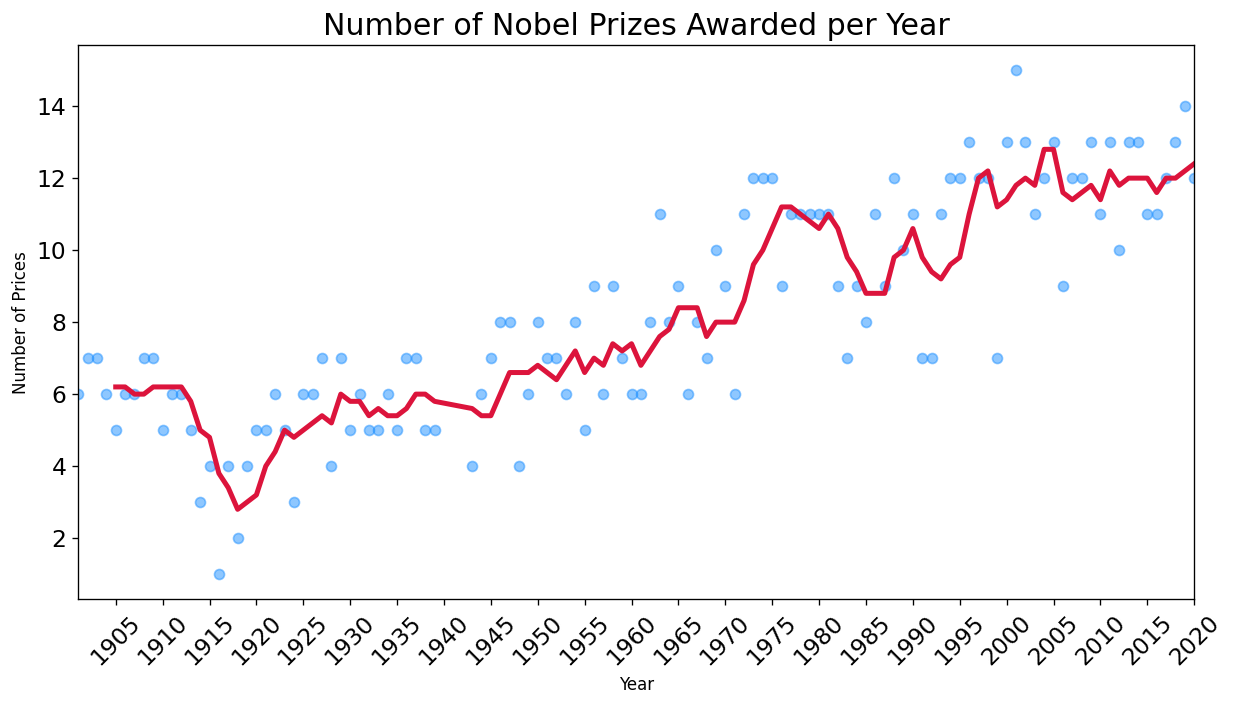

In [23]:
plt.figure(figsize=(12,6), dpi=120)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

plt.scatter(x = df_timestamp["year"], y = df_timestamp["full_name"], color="dodgerblue", alpha=0.5)
plt.plot(df_timestamp["year"], df_timestamps_5y, c='crimson', linewidth=3)

ax = plt.gca()
ax.set_xlim(df_timestamp["year"].min(), df_timestamp["year"].max())

# Labels
plt.xlabel('Year')
plt.ylabel('Number of Prices')

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [24]:
df_organization_type = df.groupby(["year", "laureate_type"], as_index=False)["laureate_type"].value_counts()
df_share_prize = df.groupby("year", as_index=False)["shared_pct"].mean()
df_share_prize

,year,shared_pct
0,1901,83.33
1,1902,71.43
2,1903,71.43
3,1904,83.33
4,1905,100.00
...,...,...
112,2016,54.55
113,2017,50.00
114,2018,46.15
115,2019,42.86


In [25]:
# 5 Year rolling:
df_share_prize_5y = df_share_prize['shared_pct'].rolling(window=5).mean()
df_share_prize_5y

0       NaN
1       NaN
2       NaN
3       NaN
4     81.90
       ... 
112   52.28
113   50.28
114   50.28
115   49.62
116   48.71
Name: shared_pct, Length: 117, dtype: float64

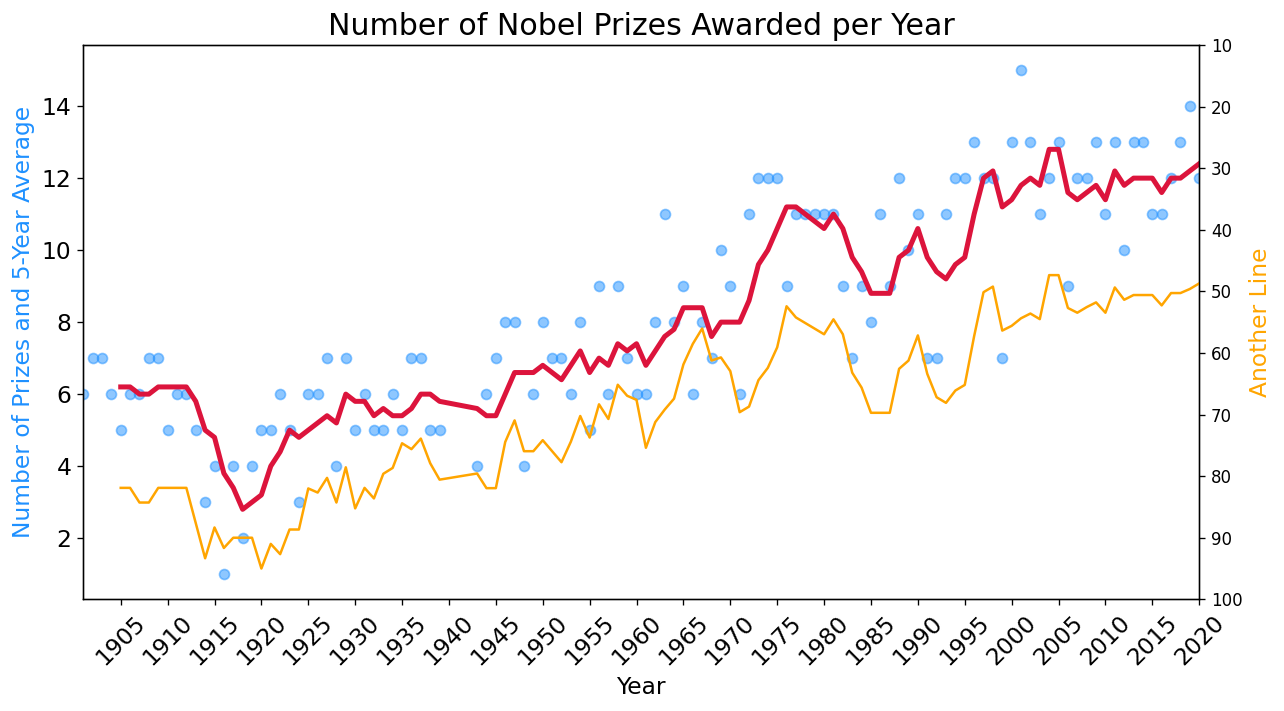

In [26]:
plt.figure(figsize=(12,6), dpi=120)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

# Create twin axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plotting data
ax1.scatter(x = df_timestamp["year"], y = df_timestamp["full_name"], color="dodgerblue", alpha=0.5)
ax2.plot(df_timestamp["year"], df_share_prize_5y, c="orange")
ax1.plot(df_timestamp["year"], df_timestamps_5y, c='crimson', linewidth=3)

# Setting limitations
ax1.set_xlim(df_timestamp["year"].min(), df_timestamp["year"].max())
plt.yticks(np.arange(100, 0, -10))

# Labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Prizes and 5-Year Average', fontsize=14, color="dodgerblue")
ax2.set_ylabel('Another Line', fontsize=14, color="orange")

# Line for inverting y_axis
ax2.invert_yaxis()

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [223]:
top20_countries  = df.groupby(["birth_country_current", "ISO"], as_index=False).agg({"full_name":"count"})
top20_countries.rename(columns={"full_name": "prices"}, inplace=True)
top20_countries = top20_countries.sort_values(by=["prices", "birth_country_current"], ascending=False)[:20]

In [227]:
fig = px.bar(top20_countries, x="prices", y="birth_country_current", title="Top 20 Countries with Nobel Prizes", orientation='h', color="prices")
fig.update_layout(
    width=1500,
    height=750,
    barmode='stack',
    yaxis={'categoryorder': 'total ascending'},  # Order y-axis categories by total ascending
)

# Adjusting individual trace (bar) width
fig.update_traces(
    width=0.8,  # Adjust the width of each bar
)

fig.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False)


fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [225]:
fig = px.choropleth(top20_countries, locations="ISO",
                    color_continuous_scale="matter", # Color_continuous_scale is for type of color
                    hover_name="birth_country_current",
                    color="prices") # On the other hand, colos says which type of data to look at
fig.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States? - Economics
* In which category does Germany have more prizes than the UK? - Physics
* In which categories does France have more prizes than Germany? - Literature and Economics
* Which category makes up most of Australia's nobel prizes? - Medicines
* Which category makes up half of the prizes in the Netherlands? - Physics
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine? - Only in Physics and Medicine


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:



In [135]:
df_cat_state = (
    df.groupby(["birth_country_current", "category"])
    .agg(prices=("full_name", "count"))
    .assign(total_prices=lambda x: x.groupby("birth_country_current")["prices"].transform("sum"))
    .sort_values(by="total_prices", ascending=False)
    .head(41)
)
# To sum up the process:
# We start by grouping by country and category.
# Then, we count the number of names, also known as prices.
# Assigning means creating a new column with predefined calculations.
# Next, we sort by total prices per country.
# Lastly, we take 30 samples, which means 30 / 6 = 5 countries.

# Solution
Here, we merge two DataFrames to ensure that we get the exact number of countries.


In [148]:
df_prices_sym = df.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
merged_df = pd.merge(df_prices_sym, top20_countries[:20], on='birth_country_current')

In [143]:
fig = px.bar(df_cat_state,
       x=df_cat_state["prices"],
       y=df_cat_state.index.get_level_values(0),
       title="Top 20 Countries with Nobel Prizes",
       orientation="h",
       color=df_cat_state.index.get_level_values(1),)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [228]:
fig = px.bar(merged_df,
       x="prize",
       y="birth_country_current",
       title="Top 20 Countries with Nobel Prizes",
       orientation="h",
       color="category")

fig.update_layout(yaxis={'categoryorder':'total ascending'},xaxis_title='Number of Prizes', yaxis_title='Country')
fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 1950
* Which country or countries were leading previously? Germany, France, UK

* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [219]:
df_time_prices = df.groupby(['birth_country_current', "year"], as_index=False).agg({"full_name": "count"})
df_time_prices.rename(columns={"full_name": "prices"}, inplace=True)
df_time_prices.tail(20)

,birth_country_current,year,prices
607,United States of America,2005,5
608,United States of America,2006,6
609,United States of America,2007,3
610,United States of America,2008,3
611,United States of America,2009,6
612,United States of America,2010,3
613,United States of America,2011,6
614,United States of America,2012,5
615,United States of America,2013,5
616,United States of America,2014,3


In [217]:
# Calculate cumulative sum of prices per country over time
df_cumsum_prices = df_time_prices.groupby(["birth_country_current", "year"]).agg({"prices": "sum"}).groupby(level=[0]).cumsum()

# Reset index to make the DataFrame flat again
df_cumsum_prices.reset_index(inplace=True)

# Explanation of the code above:
# First, we group the data by country and year, summing up the prices (assuming they are already summed).
# Then, we group the DataFrame by country to cumulatively sum the prices over time.
# `level=[0]` specifies that we want to group by the first level of the multi-index, which is the country.

In [222]:
fig = px.line(df_cumsum_prices, x="year", y="prices", color="birth_country_current", title="Cumulative sum of prices per country over time")
fig.update_layout(width = 1200, height = 600)
fig.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [265]:
df_organization = df.groupby("organization_name", as_index=False).agg({"full_name":"count"}).sort_values(by="full_name", ascending=True)
df_organization.query("full_name > 1", inplace=True)
df_organization.rename(columns={"full_name": "prices"}, inplace=True)
df_organization_subset = df_organization[-20:]

# Simplier Version

In [287]:
top20_orgs = df.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

organization_name
Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [262]:
bar_fig = px.bar(df_organization_subset, y="organization_name", x="prices", title="Number of Members per Organization", orientation="h", color="prices", color_continuous_scale="Viridis")
bar_fig.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [267]:
df_organization_city = df.groupby("organization_city", as_index=False).agg({"full_name":"count"}).sort_values(by="full_name", ascending=True)
df_organization_city.query("full_name > 1", inplace=True)
df_organization_city.rename(columns={"full_name": "prices"}, inplace=True)
df_organization_city_subset = df_organization_city[-20:]

In [268]:
bar_fig = px.bar(df_organization_city_subset, y="organization_city", x="prices", title="Number of Members per Organization", orientation="h", color="prices", color_continuous_scale="Viridis")
bar_fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [270]:
df_birth_city = df.groupby("birth_city", as_index=False).agg({"full_name":"count"}).sort_values(by="full_name", ascending=True)
df_birth_city.query("full_name > 1", inplace=True)
df_birth_city.rename(columns={"full_name": "prices"}, inplace=True)
df_birth_city_subset = df_birth_city[-20:]

In [273]:
bar_fig = px.bar(df_birth_city_subset, y="birth_city", x="prices", title="Number of Members per Organization", orientation="h", color="prices", color_continuous_scale="Plasma")
bar_fig.update_layout(xaxis_title="Number of Laureates", yaxis_title="Birth City")
bar_fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [280]:
df_locations = df.groupby(["organization_country", "organization_city", "organization_name"]).agg({"full_name":"count"}).reset_index()
df_locations.rename(columns={"full_name":"prize"}, inplace=True)
df_locations.sort_values(by="prize", ascending=False, inplace=True)
df_locations

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [285]:
fig = px.sunburst(
    df_locations,
    path=["organization_country", "organization_city", "organization_name"],
    values="prize",
    hover_data=["prize"],
    color_continuous_midpoint=np.average(df_locations["prize"])
)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [288]:
df

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,shared_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,33.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,25.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.00


In [292]:
df["winning_year"] = df["year"] - df["birth_date"].dt.year
df["winning_year"].dropna(inplace=True)

### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [296]:
df["winning_year"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_year, dtype: float64

In [306]:
oldest_row = df.loc[df["winning_year"].idxmax()]
#print(oldest_row)
youngest_row = df.loc[df["winning_year"].idxmin()]
#print(youngest_row)

<Axes: xlabel='winning_year', ylabel='Count'>

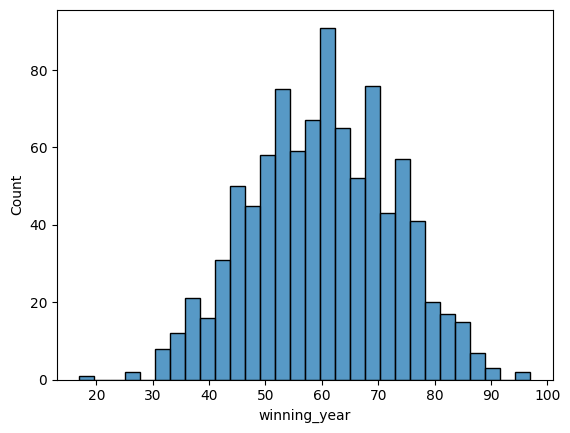

In [320]:
sns.histplot(df["winning_year"], bins=30)

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

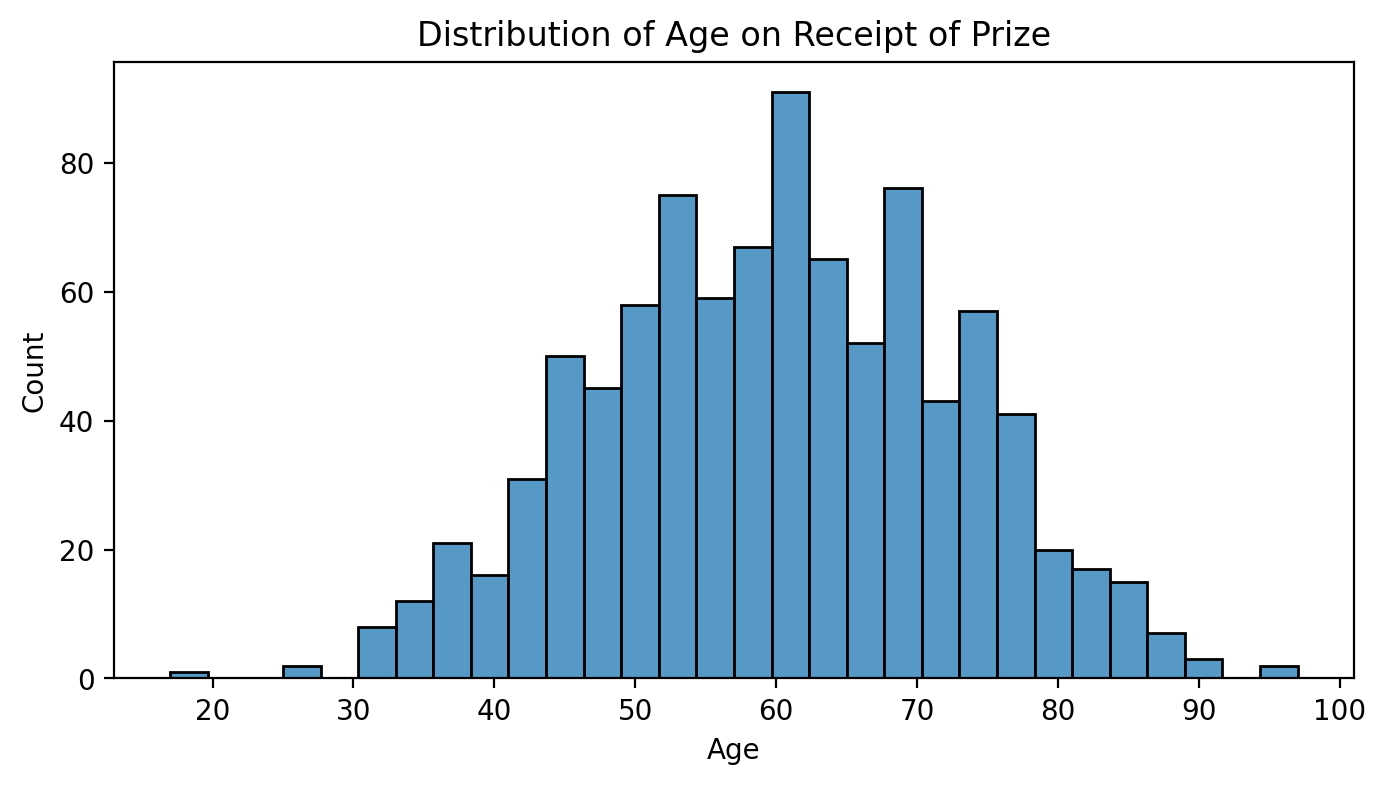

In [319]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x=df["winning_year"],
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


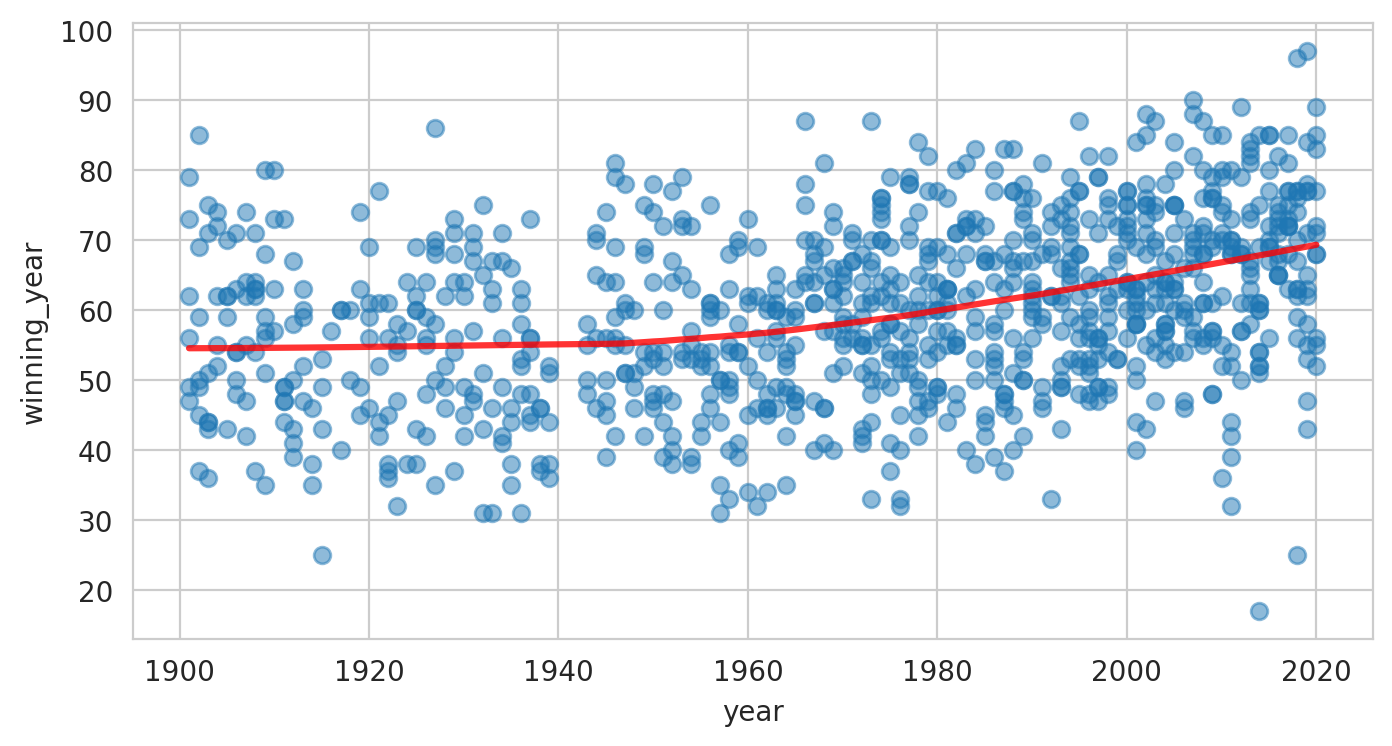

In [334]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=df, y="winning_year", x="year", lowess=True, line_kws={"color":"red", "alpha":0.8}, scatter_kws={"alpha":0.5})
  plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest? Economics and Literature
* In which prize category are the average winners the youngest? - Physics

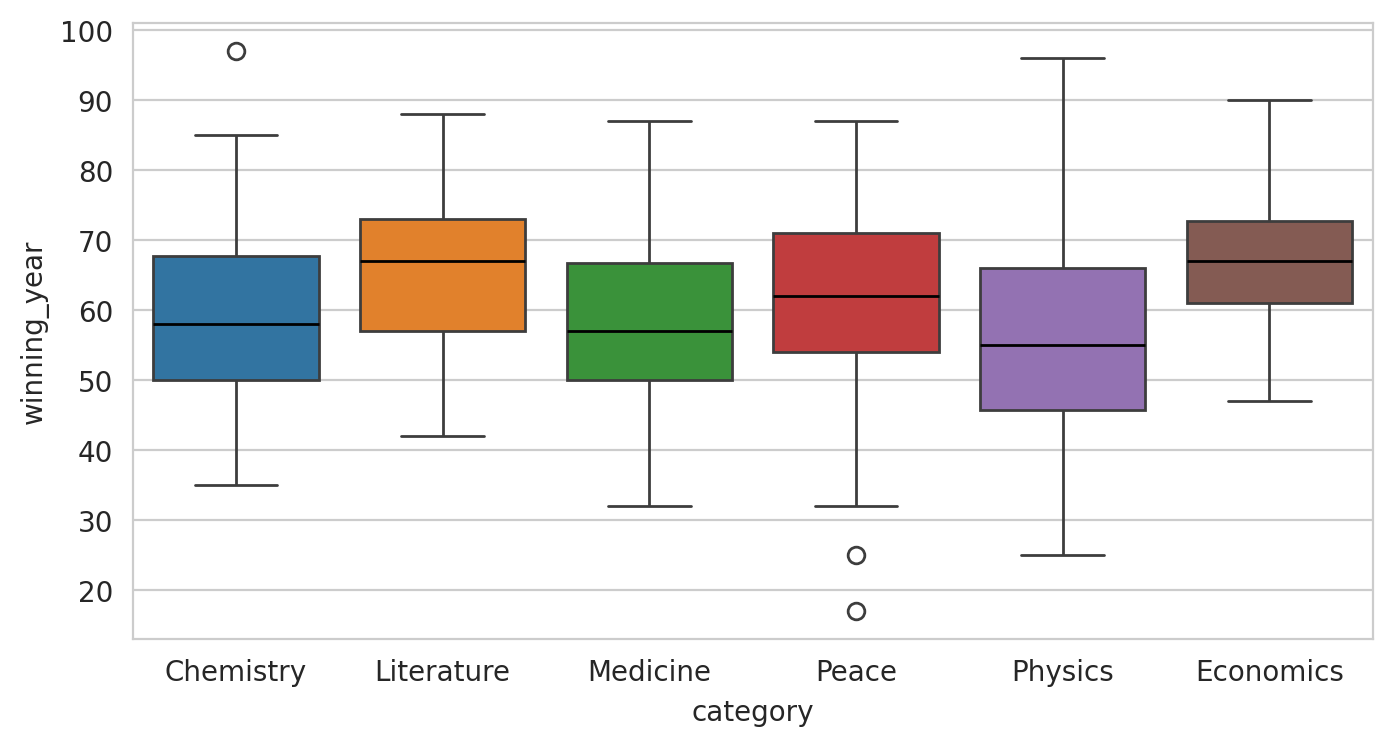

In [349]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df,
                x="category",
                y="winning_year",
                medianprops={"color": "black"},
                hue="category")  # Set a specific palette for different colors per category
    plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


<Figure size 1600x800 with 0 Axes>

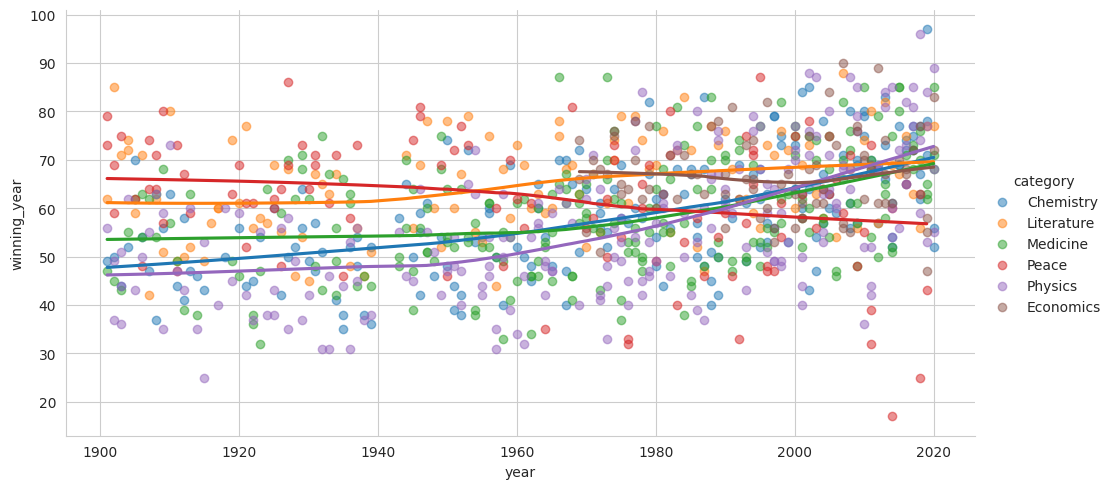

In [367]:
# Crating one packed chart with all values
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    lm = sns.lmplot(data=df, x="year", y="winning_year", hue="category", aspect=2, lowess=True, scatter_kws={"alpha":0.5})

    plt.show()

<Figure size 2000x1000 with 0 Axes>

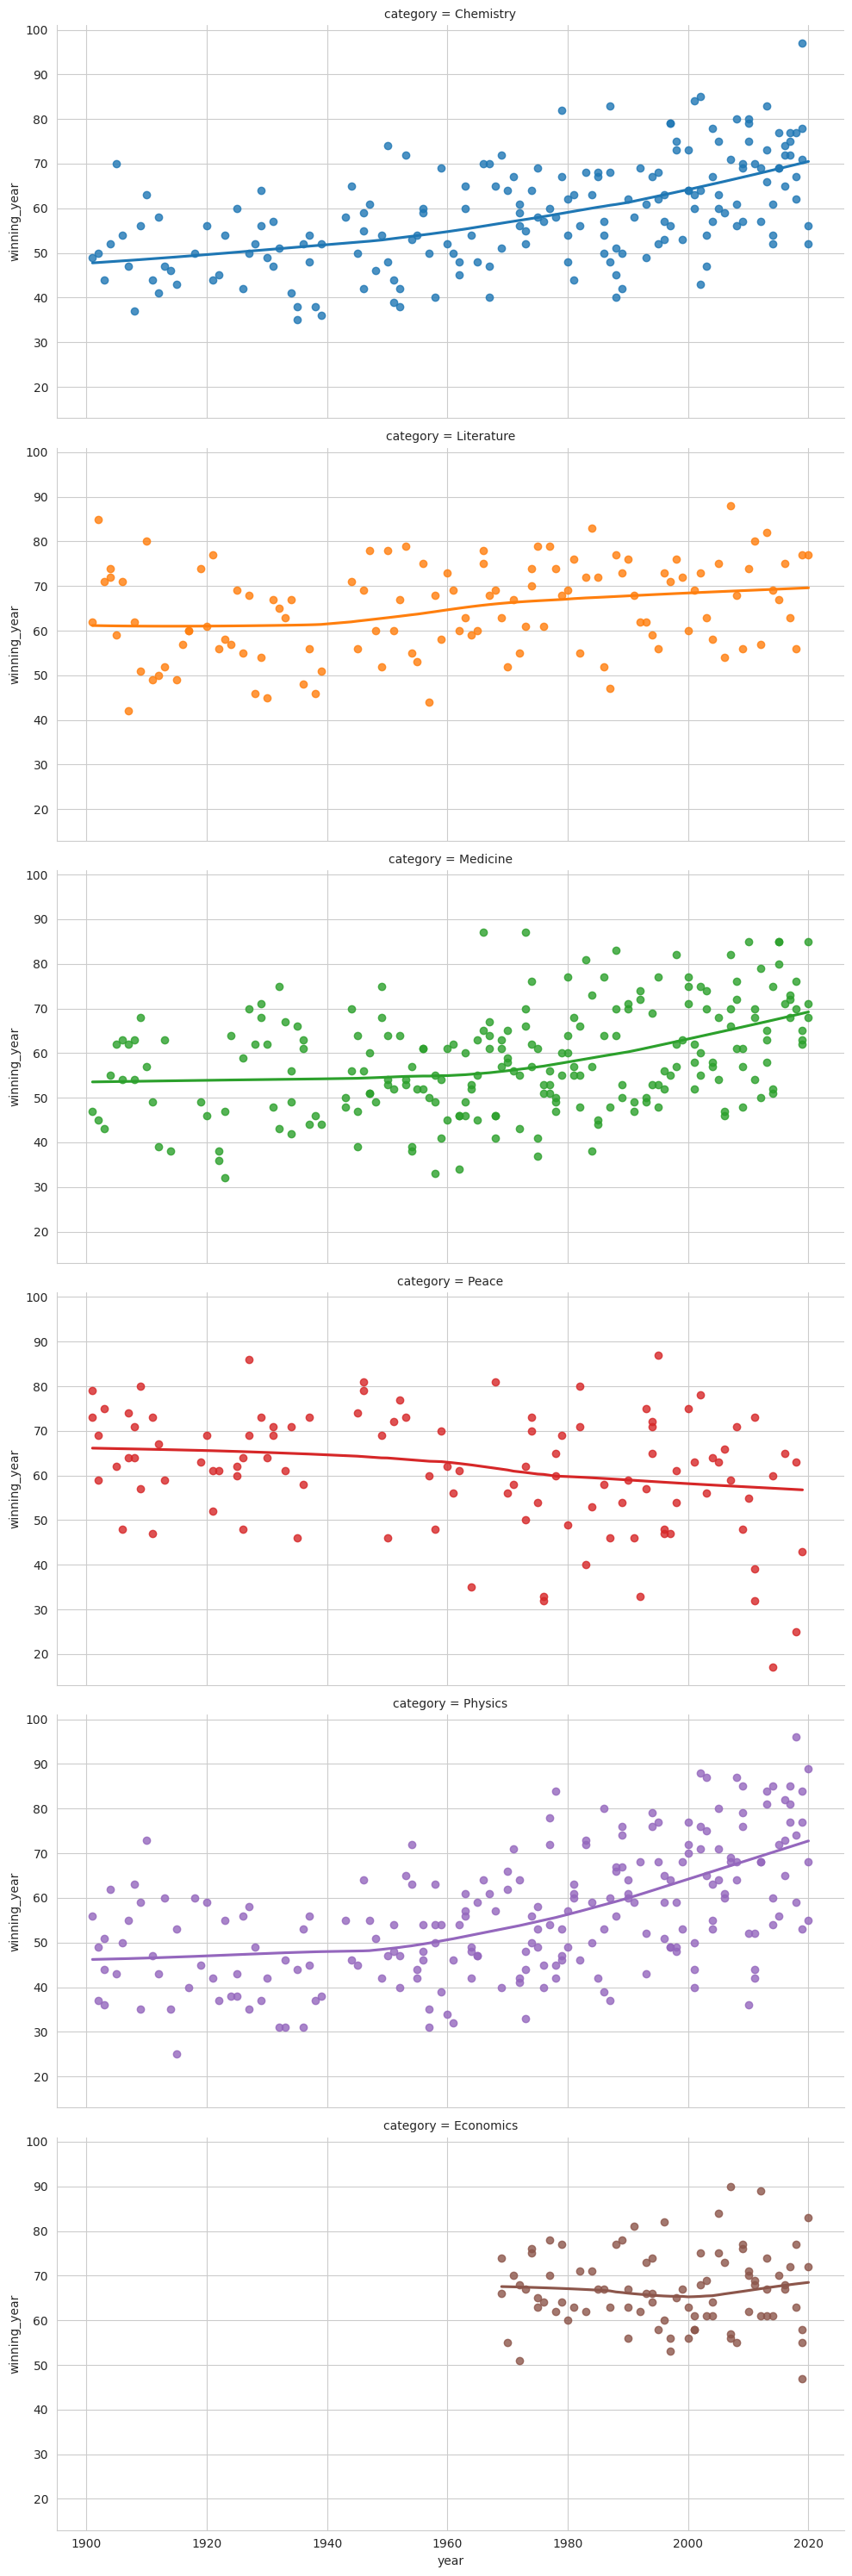

In [364]:
# Creating 6 subplots for each category
plt.figure(figsize=(10, 5), dpi=200)
with sns.axes_style("whitegrid"):
    lm = sns.lmplot(data=df, x="year", y="winning_year", hue="category", row="category", aspect=2, lowess=True)

    plt.show()